Fund Separation Theorem and the Capital Market Line

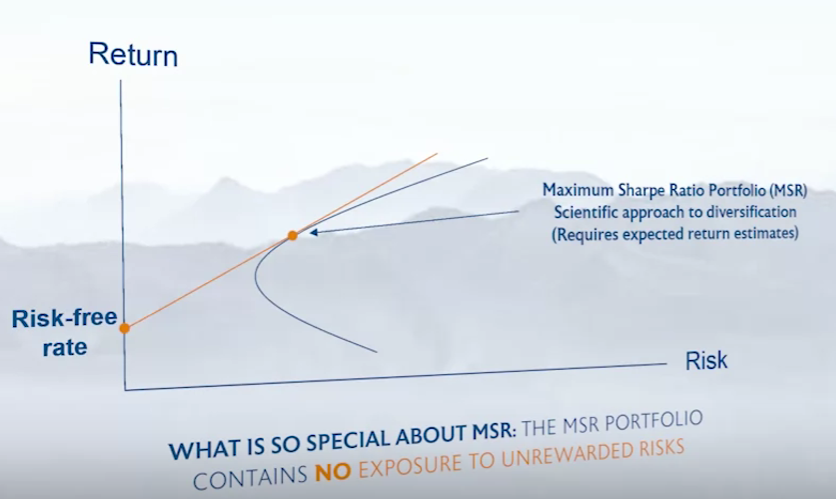


it is only systematic risk contained

What is the Sharpe ratio for a portfolio with expected return 12% and volatility 20% if the risk-free rate is 2%?

Answer: Sharpe ratio is given by (12%-2%)/20%=1/2, suggesting that each additional unit of volatility is rewarded with 50 basis points extra returns.    

What is the max Sharpe ratio in case all securities have the same expected returns? 

A: The Global Minimum Variance portfolio is also Maximum Sharpe Ratio when all expected return are equal. Indeed in these conditions, portfolio weights do no longer impact the numerator of the Sharpe ratio, so maximizing the Sharpe ratio is equivalent to minimizing portfolio volatility:

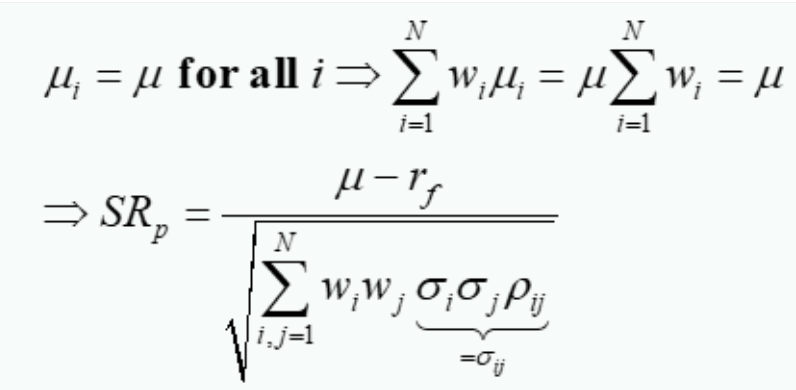

Lab Session-Locating the Max Sharpe Ratio Portfolio

In [54]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import edhec_risk_kit as erk

ind=erk.get_ind_returns()
er=erk.annualize_rets(ind['1996':'2000'],12)
cov=ind['1996':'2000'].cov()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


'''

In [55]:
from scipy.optimize import minimize
import numpy as np
import pandas as pd
#maxmum sharpe ratio
def msr(riskfree_rate, er, cov):
    """
    Riskfree rate + ER + COV -> W
    """
    n=er.shape[0]
    init_guess=np.repeat(1/n, n)
    bounds=((0.0,1.0), )*n
    weights_sum_to_1={
        'type': 'eq',
        'fun': lambda weights: np.sum(weights)-1
    }
    def neg_sharpe_ratio(weights,riskfree_rate, er, cov):
        """
        Returns the negative of the sharpe ratio, given weights"""
        r= erk.portfolio_return(weights, er)
        vol=erk.portfolio_vol(weights, cov)
        return -(r-riskfree_rate)/vol
    
    results=minimize(neg_sharpe_ratio, init_guess,
                     args=(riskfree_rate, er, cov), method='SLSQP',
                     options={'disp':False},
                     constraints=(weights_sum_to_1),
                     bounds=bounds)
    return results.x

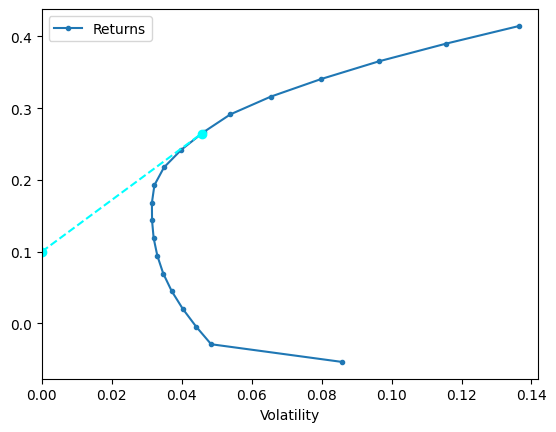

In [56]:
ax=erk.plot_ef(20,er,cov)
ax.set_xlim(left=0)
rf=0.1
w_msr=msr(rf,er,cov)
r_msr=erk.portfolio_return(w_msr,er)
vol_msr=erk.portfolio_vol(w_msr,cov)
# Add CML
cml_x=[0, vol_msr]
cml_y=[rf, r_msr]
ax.plot(cml_x,cml_y, color='cyan', marker='o', linestyle='dashed')

<Axes: xlabel='Volatility'>

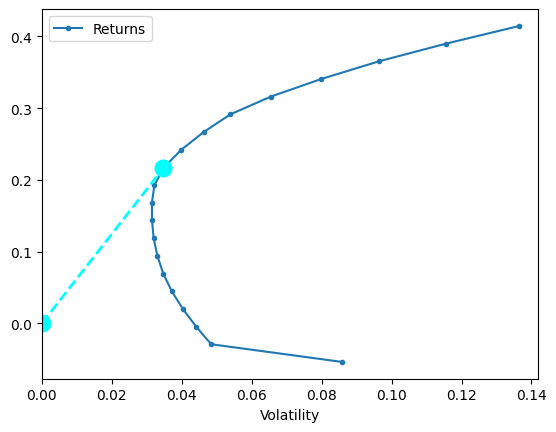

In [57]:
erk.plot_ef(20, er, cov, show_cml=True)

<Axes: xlabel='Volatility'>

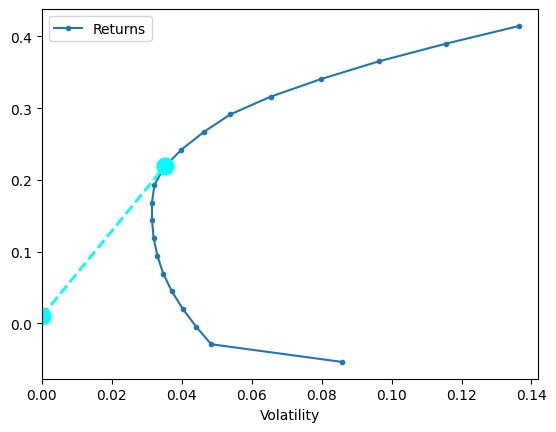

In [58]:
erk.plot_ef(20, er, cov, show_cml=True, riskfree_rate=0.01)

Lack of robustness of Markowitz analysis

Estimation error is the key challenge in portfolio optimization

Various methodologies exist for improving estimates for expected returns and covariance parameters.

However some uncertainty, always remains which are particularly large for expected returns.


The GMV is the portfolio that is least sensitive to errors in parameter estimates. Since it requires no expected return estimates, it is only sensitive to errors in risk parameter estimates. 

Markowitz analysis is Hardly used in practice since it tens to yield unreasonable corner solutions.

This is because of the Presence of parameter estimates.

The equally-weighted portfolio most likely to have the highest Sharpe ratio, because it not subject to any estimation error and as a result will likely have a higher risk-adjusted performance compared to the MSR (maximum sharpe ratio) portfolio based on sample estimates.

# Lab Session-Plotting EW and GMV on the Efficient Frontier

In [59]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import numpy as np
import pandas as pd
import edhc_risk_kit as erk

ind=erk.get_ind_returns()
er=erk.annualize_rets(ind['1996':'2000'],12)
cov=ind['1996':'2000'].cov()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [60]:
l=['Food', 'Steel']
erk.msr(0.1, er[l], cov.loc[l,l])
# The optimal portfolio is food 75%, Steel 25%

array([0.75040362, 0.24959638])

In [61]:
er[l]
#expected return: food 11.7%, steel 11.6%

Food     0.116799
Steel    0.115809
dtype: float64

In [62]:
erk.msr(0.1, np.array([0.11, 0.12]), cov.loc[l,l])
#slightly change expected returns, the weight would have a great change

array([0.57930354, 0.42069646])

In [63]:
erk.msr(0.1, np.array([0.10, 0.13]), cov.loc[l,l])
#slightly change expected returns, the weight would have a great change

array([0., 1.])

In [64]:
erk.msr(0.1, np.array([0.13, 0.10]), cov.loc[l,l])
#slightly change expected returns, the weight would have a great change

array([1., 0.])

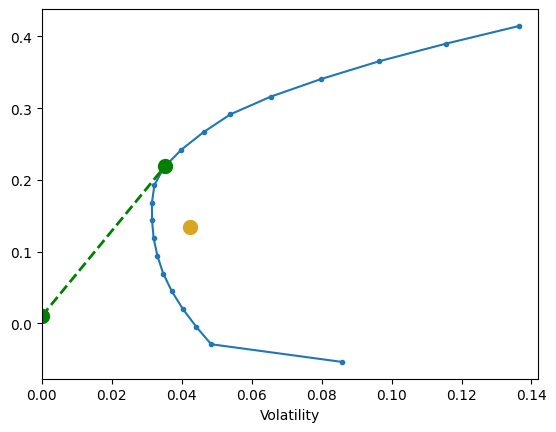

In [65]:
erk.plot_ef(20, er, cov, show_cml=True, riskfree_rate=0.01, show_ew=True)
# The ew is at inside of the efficient frontier

<Axes: xlabel='Volatility'>

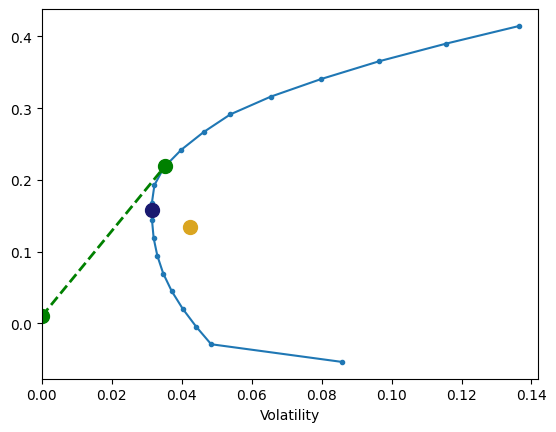

In [66]:
erk.plot_ef(20, er, cov, show_cml=True, riskfree_rate=0.01, show_ew=True, show_gmv=True)
# The GMV(global minimum is on the efficient frontier and with the lowest volatility at the frontier)

In [67]:
#Use the EDHEC Hedge Fund Indices data set that we used in the lab assignment 
#as well as in the previous week’s assignments. 
#Load them into Python and perform the following analysis based on data since 2000 (including all of 2000): 
#What was the Monthly Parametric Gaussian VaR at the 1% level (as a +ve number) of the Distressed Securities strategy?
hfi = erk.get_hfi_returns()
hfi = hfi["2000":]
var_gaussian = erk.var_gaussian(hfi[["Distressed Securities"]],level=1,modified=False)["Distressed Securities"]
print(f'The answer is {var_gaussian * 100:.2f}')

The answer is 3.14


c:\Users\lishe\Documents\GitHub\Programming-Study\Investment Management with Python and Machine Learning\Introduction to Portfolio Construction and Analysis with Python\week1\edhc_risk_kit.py:23: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  hfi = pd.read_csv("edhec-hedgefundindices.csv",


In [68]:
#Question 2 
#Use the same data set at the previous question. 
#What was the 1% VaR for the same strategy after applying the Cornish-Fisher Adjustment?
var_gaussian = erk.var_gaussian(hfi[["Distressed Securities"]],level=1,modified=True)["Distressed Securities"]
print(f'The answer is {var_gaussian * 100:.2f}')

The answer is 4.97


In [69]:
#Question 3
#Use the same dataset as the previous question. 
#What was the Monthly Historic VaR at the 1% level (as a +ve number) of the Distressed Securities strategy?
var_historic = erk.var_historic(hfi[["Distressed Securities"]],level=1)["Distressed Securities"]
print(f'The answer is {var_historic * 100:.2f}')

The answer is 4.26


In [70]:
#Next, load the 30 industry return data using the erk.get_ind_returns() function that we developed during the lab sessions. 
#For purposes of the remaining questions, use data during the 5 year period 2013-2017 (both inclusive) to estimate the expected returns as well as the covariance matrix. 
#To be able to respond to the questions, you will need to build the MSR, EW and GMV portfolios consisting of the “Books”, “Steel”, "Oil", and "Mines" industries. 
#Assume the risk free rate over the 5 year period is 10%.

#What is the weight of Steel in the EW Portfolio? 
l = ["Books", "Steel", "Oil", "Mines"]
ind = erk.get_ind_returns()["2013":"2017"][l]
#In equally weighted portfolio, each industry is 25%
print(f'The answer is 25.0')

The answer is 25.0


In [71]:
# What is the weight of the largest component of the MSR portfolio?
er = erk.annualize_rets(ind,12)
cov = ind.cov()
msr_weights = erk.msr(0.1, er,cov)
max_weight = np.argmax(msr_weights)
print(f'The answer is {msr_weights[max_weight] * 100:.2f}')

The answer is 100.00


In [72]:
#Question 6
#Which of the 4 components has the largest weight in the MSR portfolio?
print(f'The answer is {l[max_weight]}')

The answer is Steel


In [73]:
#How many of the components of the MSR portfolio have non-zero weights?  
non_zero_elems = msr_weights[msr_weights > 0.0000000001].size
print(f'The answer is {non_zero_elems}')

The answer is 1


In [74]:
#Question 8
#What is the weight of the largest component of the GMV portfolio?
gmv_weights = erk.gmv(cov)
max_weight = np.argmax(gmv_weights)
print(f'The answer is {gmv_weights[max_weight] * 100:.2f}')

The answer is 47.70


In [75]:
#Which of the 4 components has the largest weight in the GMV portfolio?
print(f'The answer is {l[max_weight]}')

The answer is Books


In [76]:
# How many of the components of the GMV portfolio have non-zero weights?    
non_zero_elems = gmv_weights[gmv_weights > 0.0000000001].size
print(f'The answer is {non_zero_elems}')

The answer is 3


In [77]:
#Assume two different investors invested in the GMV and MSR portfolios at the start of 2018 
#using the weights we just computed. 
#Compute the annualized volatility of these two portfolios over the next 12 months of 2018? 
#(Hint: Use the portfolio_vol code we developed in the lab 
#and use ind[“2018”][l].cov() to compute the covariance matrix for 2018, 
#assuming that the variable ind holds the industry returns 
#and the variable l holds the list of industry portfolios you are willing to hold. 
#Don’t forget to annualize the volatility.


# What would be the annualized volatility over 2018 using the weights of the MSR portfolio?
ind = erk.get_ind_returns()["2018":][["Books", "Steel", "Oil", "Mines"]]
er = erk.annualize_rets(ind,12)
cov = ind.cov()
vols = erk.portfolio_vol(msr_weights, cov)*(12 ** 0.5)
print(f'The answer is {vols*100:.2f}')

The answer is 21.98


In [78]:
#What would be the annualized volatility over 2018 using the weights of the GMV portfolio? 
#(Reminder and Hint: Use the portfolio_vol code we developed in the lab 
#and use ind[“2018”][l].cov() to compute the covariance matrix for 2018, 
#assuming that the variable ind holds the industry returns 
#and the variable l holds the list of industry portfolios you are willing to hold. 
#Don’t forget to annualize the volatility.

vols = erk.portfolio_vol(gmv_weights, cov)*(12 ** 0.5)
print(f'The answer is {vols*100:.2f}')

The answer is 18.97
